In [1]:
import numpy as np
import time

class Node:
    
    leafEnd = -1
    
    def __init__(self, start, end):
        self.children = {}
        self.suffixLink = None
        self.start = start
        self.suffixIndex = None
        self.end = end
        
    def setSuffixIndex(self, i):
        self.suffixIndex = i
        
    def setSuffixLink(self, node):
        self.suffixLink = node
        
    def setLeafEnd(self, end):
        Node.leafEnd = end
        
    def getEnd(self):
        if self.end == 'leafEnd':
            return Node.leafEnd
        else:
            return self.end

        
class SuffixTree:

    
    def __init__(self, sequence):
        self.root = None
        self.activeLength = 0
        self.activeEdge = -1
        self.activeNode = None
        self.remainingSuffixCount = 0
        self.lastNewNode = None
        self.sequence = sequence
        self.splitEnd = None
        
        
    def newNode(self, start, end):
        node = Node(start, end)
        node.setSuffixLink(self.root)
        node.setSuffixIndex(-1)
        return node
    
    def edgeLength(self, node):
        return node.getEnd() - node.start + 1
    
    def walkDown(self, currNode):
        if self.activeLength >= self.edgeLength(currNode):
            self.activeEdge += self.edgeLength(currNode)
            self.activeLength -= self.edgeLength(currNode)
            self.activeNode = currNode
            return True
        return False
    
    def extendSuffixTree(self, pos):
        self.activeNode.setLeafEnd(pos)
        self.remainingSuffixCount += 1
        self.lastNewNode = None
        
        while self.remainingSuffixCount > 0:
            if self.activeLength == 0:
                self.activeEdge = pos

            if self.activeNode.children.get(self.sequence[self.activeEdge]) is None:
                self.activeNode.children[self.sequence[self.activeEdge]] = self.newNode(pos, 'leafEnd')
                if self.lastNewNode != None:
                    self.lastNewNode.setSuffixLink(self.activeNode)
                    self.lastNewNode = None
            else:
                next = self.activeNode.children[self.sequence[self.activeEdge]]
                if self.walkDown(next):
                    continue
                if self.sequence[next.start + self.activeLength] == self.sequence[pos]:
                    if self.lastNewNode != None and self.activeNode != self.root:
                        self.lastNewNode.suffixLink = self.activeNode
                        self.lastNewNode = None
                    self.activeLength += 1
                    break
                    
                self.splitEnd = next.start + self.activeLength - 1
                split = self.newNode(next.start, self.splitEnd)
                self.activeNode.children[self.sequence[self.activeEdge]] = split
                split.children[self.sequence[pos]] = self.newNode(pos, 'leafEnd')
                next.start += self.activeLength
                split.children[self.sequence[next.start]] = next
                if self.lastNewNode != None:
                    self.lastNewNode.suffixLink = split
                self.lastNewNode = split
            self.remainingSuffixCount -= 1
            
            if self.activeNode == self.root and self.activeLength > 0:
                self.activeLength -= 1
                self.activeEdge = pos - self.remainingSuffixCount + 1
            elif self.activeNode != self.root:
                self.activeNode = self.activeNode.suffixLink
                
                
    def buildSuffixTree(self):
        size = len(self.sequence)
        rootEnd = -1
        self.root = self.newNode(-1, rootEnd)
        self.activeNode = self.root
        for i in range(size):
            self.extendSuffixTree(i)

    def getEdgeLabel(self, node):
        start = node.start
        end = node.getEnd()
        return self.sequence[start:end+1]
            
    def printTree(self):
        
        
        def printDic(d, s):
            if d == None:
                return
            else:
                for keys, values in d.items():
                    l = ''
                    if d == self.root.children:
                        s = ''
                    if values.children != {}:
                        l = self.getEdgeLabel(values)
                    else:
                        a = self.getEdgeLabel(values)
                        print(s + a)
                    printDic(values.children, s + l)
                    
                    
        printDic(self.root.children, '')
        
        
    def getSuffixes(self):        
        
        suffixes = []
        
        def printDic(d, s, suffixes):
            if d == None:
                return
            else:
                for keys, values in d.items():
                    l = ''
                    if d == self.root.children:
                        s = ''
                    if values.children != {}:
                        l = self.getEdgeLabel(values)
                    else:
                        a = self.getEdgeLabel(values)
                        f = s+a
                        suffixes.append(f[:-1])
                    printDic(values.children, s + l, suffixes)
                    
                    
        printDic(self.root.children, '', suffixes)
        return suffixes
    
    def hammingDistance(self, s1,s2):
        mismatch = 0
        for i in range(len(s1)):
            if s1[i] != s2[i]:
                mismatch += 1
        return mismatch
    
    def matchingSuffix(self, sequence, mismatches):      
        longestMatch = ''
        stack = [(self.root, 0)]
        
        while stack:
            node, lenght = stack.pop()
            
            for children in node.children:
                childNode = node.children[children]
                edgeLabel = self.getEdgeLabel(childNode)
                le = len(edgeLabel)
                if edgeLabel[-1] == '$':
                    l = lenght + le - 1
                    suffix = sequence[-l:]
                    prefix = self.sequence[:-1][-l:][::-1]
                    if len(suffix) == len(prefix):
                        if self.hammingDistance(suffix, prefix) / float(len(prefix)) <= mismatches:
                            if len(suffix) > len(longestMatch):
                                longestMatch = suffix
                else:
                    l = lenght + le
                    if lenght == 0:
                        subSuffix = sequence[-l:]
                    else:
                        subSuffix = sequence[-l:le]
                    if self.hammingDistance(subSuffix, edgeLabel[::-1]) / float(len(self.sequence)) <= mismatches:
                        stack.append((childNode, l))
                        
        return longestMatch       

In [2]:
text = 'abcabxabcd$'
tree = SuffixTree(text)
tree.buildSuffixTree()
#tree.printt(tree.root, 0)
tree.printTree()
tree.getSuffixes()

abxabcd$
abcd$
abcabxabcd$
bxabcd$
bcd$
bcabxabcd$
cd$
cabxabcd$
xabcd$
d$
$


['abxabcd',
 'abcd',
 'abcabxabcd',
 'bxabcd',
 'bcd',
 'bcabxabcd',
 'cd',
 'cabxabcd',
 'xabcd',
 'd',
 '']

In [3]:
def task1(adapterSequence, nameFile):
    with open(nameFile, 'r') as file:
        S = file.read()
        file.close()
    sequences = S.split('\n')
    #adapterSequence = 'TGGAATTCTCGGGTGCCAAGGAACTCCAGTCACACAGTGATCTCGTATGCCGTCTTCTGCTTG'
    reversedAdapterSequence = adapterSequence[::-1]
    tree = SuffixTree(reversedAdapterSequence + '$')
    tree.buildSuffixTree()
    numberOfSequence = 0
    lengthDistribution = {}
    for sequence in sequences:
        suffix = tree.matchingSuffix(sequence, 0.0)
        if len(suffix) > 0:
            numberOfSequence += 1
            length = len(sequence[:-len(suffix)])
            if length in lengthDistribution.keys():
                lengthDistribution[length] += 1
            else:
                lengthDistribution[length] = 1
    return numberOfSequence, lengthDistribution

def task2(m):
    with open('s_3_sequence_1M.txt', 'r') as file:
        S = file.read()
        file.close()
    sequences = S.split('\n')
    adapterSequence = 'TGGAATTCTCGGGTGCCAAGGAACTCCAGTCACACAGTGATCTCGTATGCCGTCTTCTGCTTG'
    reversedAdapterSequence = adapterSequence[::-1]
    tree = SuffixTree(reversedAdapterSequence + '$')
    tree.buildSuffixTree()
    numberOfSequence = 0
    lengthDistribution = {}
    for sequence in sequences[:-1]:
        suffix = tree.matchingSuffix(sequence, m)
        if len(suffix) > 0:
            numberOfSequence += 1
            length = len(sequence[:-len(suffix)])
            if length in lengthDistribution.keys():
                lengthDistribution[length] += 1
            else:
                lengthDistribution[length] = 1
    return numberOfSequence, lengthDistribution


def task1bis():
    with open('s_1-1_1M.txt', 'r') as file:
        S = file.read()
        file.close()
    sequences = S.split('\n')
    numberOfSequence = 0
    lengthDistribution = {}
    adapterSequence = 'TGGAATTCTCGGGTGCCAAGGAACTCCAGTCACACAGTGATCTCGTATGCCGTCTTCTGCTTG'
    for sequence in sequences:
        tree = SuffixTree(sequence + '$')
        tree.buildSuffixTree()
        suffixes = tree.getSuffixes()
        for i in range(0,len(adapterSequence)):
            if i == 0: 
                if adapterSequence in suffixes:
                    numberOfSequence +=1
                    length = len(sequence) - len(adapterSequence)
                    if length in lengthDistribution.keys():
                        lengthDistribution[length] += 1
                    else:
                        lengthDistribution[length] = 1
                    break
            else:
                if adapterSequence[:-i] in suffixes:
                    numberOfSequence +=1
                    length = len(sequence) - len(adapterSequence[:-i])
                    if length in lengthDistribution.keys():
                        lengthDistribution[length] += 1
                    else:
                        lengthDistribution[length] = 1
                    break
    return numberOfSequence, lengthDistribution


def task3(fileName):
    with open(fileName, 'r') as file:
        S = file.read()
        file.close()
    sequences = S.split('\n')
    suffixes = {}
    noA = 0
    for sequence in sequences[:-1]:
        while sequence[-1] == 'A':
            sequence = sequence[:-1]
        adapter = "TCGTATGCCGTCTTCTGCTTG"
        if sequence[-21:] != adapter:
            noA += 1
        else:
            sequence = sequence[:-21]
            s = sequence[-5:]
            if s not in suffixes:
                suffixes[s] = [sequence[:-5]]
            else:
                suffixes[s].append(sequence[:-5])
    a = sorted(suffixes.items(), key=lambda t: len(t[1]), reverse = True)
    return a, float(noA)/len(sequences[:-1])

In [6]:
start_time = time.clock()
numberOfSequence1, lengthDistribution1 = task1bis()
print('The number of sequences is:', numberOfSequence1)
print('')
print('length distribution: \n')
print(lengthDistribution1)
print('')
print('time of execution:', time.clock() - start_time, 'seconds')


start_time = time.clock()
numberOfSequence2, lengthDistribution2 = task2(0.1)
print('The number of sequences is:', numberOfSequence2)
print('')
print('length distribution: \n')
print(lengthDistribution2)
print('')
print('time of execution:', time.clock() - start_time, 'seconds')

start_time = time.clock()
numberOfSequence3, lengthDistribution3 = task2(0.25)
print('The number of sequences is:', numberOfSequence3)
print('')
print('length distribution: \n')
print(lengthDistribution3)
print('')
print('time of execution:', time.clock() - start_time, 'seconds')



The number of sequences is: 132294

length distribution: 

{75: 107370, 74: 18653, 65: 121, 73: 1924, 60: 150, 68: 402, 61: 419, 72: 725, 69: 321, 63: 235, 71: 462, 45: 15, 62: 463, 56: 9, 66: 200, 59: 88, 70: 113, 50: 9, 64: 96, 67: 252, 47: 12, 49: 17, 44: 17, 48: 32, 20: 2, 32: 2, 58: 38, 51: 14, 55: 11, 43: 18, 52: 14, 21: 8, 33: 6, 23: 4, 14: 3, 46: 14, 15: 1, 53: 13, 57: 16, 22: 7, 54: 10, 38: 1, 24: 1, 42: 2, 31: 1, 37: 1, 18: 1, 25: 1}

time of execution: 2700.6675079178804 seconds
The number of sequences is: 670918

length distribution: 

{39: 4904, 41: 7013, 20: 7544, 8: 1129, 22: 45906, 49: 202643, 0: 141997, 24: 29231, 31: 23570, 40: 3606, 23: 26537, 34: 12750, 32: 19249, 42: 4880, 2: 903, 28: 3333, 48: 18894, 21: 10838, 36: 5124, 29: 4534, 46: 3988, 38: 4963, 17: 3918, 35: 4994, 7: 2475, 9: 1208, 33: 11237, 37: 4592, 44: 3834, 27: 2589, 18: 4308, 16: 2355, 45: 5067, 30: 5846, 25: 3237, 15: 4174, 14: 2437, 47: 4866, 10: 1755, 11: 3023, 26: 2437, 1: 372, 43: 4154, 4: 392, 6:

[75, 74, 65, 73, 60, 68, 61, 72, 69, 63, 71, 45, 62, 56, 66, 59, 70, 50, 64, 67, 47, 49, 44, 48, 20, 32, 58, 51, 55, 43, 52, 21, 33, 23, 14, 46, 15, 53, 57, 22, 54, 38, 24, 42, 31, 37, 18, 25] [107370, 18653, 121, 1924, 150, 402, 419, 725, 321, 235, 462, 15, 463, 9, 200, 88, 113, 9, 96, 252, 12, 17, 17, 32, 2, 2, 38, 14, 11, 18, 14, 8, 6, 4, 3, 14, 1, 13, 16, 7, 10, 1, 1, 2, 1, 1, 1, 1]


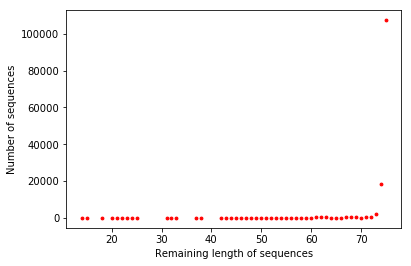

In [7]:
import matplotlib.pyplot as plt

# Generate data...
x = list(lengthDistribution1.keys())
y = list(lengthDistribution1.values())

print(x, y)

# Plot...
plt.scatter(x, y, s = 8, c='r')
plt.gray()
plt.xlabel('Remaining length of sequences')
plt.ylabel('Number of sequences')




plt.show()